In [645]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [646]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [647]:
data=pd.read_csv("Modified_Data.csv")

In [648]:
data.iloc[1]

Account Number                                        M2
Age                                                   55
Defaults                                               0
Last_Month_Payment                               751.695
Average_of_payment_of_last_two_month             751.695
Average_of_payment_of_last_three_month           751.695
Last_Month_Default                                     0
Average_of_default_of_last_two_month                   0
Average_of_default_of_last_three_month                 0
Initial_Level_Tech                                     3
Account                                                2
Payment_Settlement                                     0
Utilities                                              0
Operational_Capabilities                               3
Initial_Level_Payment_Settlement                       3
Limit_Defaults                                         2
Last_Month_used_pattern                           495.77
Average_of_used_pattern_of_last

In [649]:
# del data["Professional Info_std"]

In [650]:
data.columns

Index(['Account Number', 'Age', 'Defaults', 'Last_Month_Payment',
       'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_three_month', 'Churn', 'Time_period',
       'Contract_Time_Remaining', 'Address_mean', 'Address_std', 'Scheme_mean',
       'Scheme_std', 'Staus_mean', 'Staus_std', 'Gender_mean'

In [651]:
data["X"]=data["Account Number"].apply(lambda x: x[0])
train=data[data.X=="M"]
test=data[data.X=="V"]
del data["X"], train["X"], test["X"]

data.shape, train.shape, test.shape

((14952, 49), (9966, 49), (4986, 49))

> Percentage of Churners

In [652]:
# Percentage of Churners
print ("CHurners  :"+str(train["Churn"].sum()/len(train)*100))
print ("Non-Churners  :"+str( 100-train["Churn"].sum()/len(train)*100))

CHurners  :5.077262693156733
Non-Churners  :94.92273730684326


> 

> # Preparing data

In [653]:
#

In [654]:
data.columns

Index(['Account Number', 'Age', 'Defaults', 'Last_Month_Payment',
       'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_three_month', 'Churn', 'Time_period',
       'Contract_Time_Remaining', 'Address_mean', 'Address_std', 'Scheme_mean',
       'Scheme_std', 'Staus_mean', 'Staus_std', 'Gender_mean'

In [655]:
#

In [656]:
#Preparing data
def prepare_data(df, is_train):

    if is_train:
        return df.drop(['Churn',"Account Number"], axis=1), df['Churn']
    return     df.drop([        "Account Number"], axis=1)

In [657]:
maintrain, maintrain_target =prepare_data(train, 1)
main_data,Nopee= prepare_data(test,1)

In [658]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split( maintrain, maintrain_target, stratify=Ytrain)

In [659]:
ytrain.sum()/len(ytrain), ytest.sum()/len(ytest)

(0.05070912496655071, 0.05096308186195827)

> 

In [660]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.metrics import roc_curve, auc

>  # Functions

In [661]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

> # Cost Description

In [662]:
admin_cost=3
offer_cost=100
clv=1000#customer lifetime value

In [663]:
conv=0.5
tnc = 0.
fpc = admin_cost+offer_cost
fnc = clv
tpc = conv*offer_cost + (1. - conv)*(clv+admin_cost)

In [664]:
cost=np.array([[tnc,fpc],[fnc, tpc]])
print (cost)

[[    0.    103. ]
 [ 1000.    551.5]]


In [665]:
def average_cost(y, ypred, cost):
    c=confusion_matrix(y,ypred)
    print (c)
    score=np.sum(c*cost)/np.sum(c)
    return (score)
def repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 >= t)*1
    return ypred

In [666]:
# Cost when we predict everything 0
print (average_cost(ytest,np.zeros(len(ytest)),cost))

[[2365    0]
 [ 127    0]]
50.963081862


In [667]:
# Cost when we predict everything 1
print (average_cost(ytest,np.ones(len(ytest)),cost))

[[   0 2365]
 [   0  127]]
125.856942215


> # 1. Logistic Regression

In [668]:
Logistic=LogisticRegression()
parameters = {"C": [0.1, 1, 10, 100]}
fitmodel = GridSearchCV(Logistic, param_grid=parameters, cv=5, scoring="f1")
fitmodel.fit(Xtrain, ytrain)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

({'C': 1}, 0.16080291216383347)

In [669]:
Logistic=LogisticRegression(C=fitmodel.best_params_['C'])
Logistic.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, Logistic.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, Logistic.predict(Xtest))))#

Training :0.952100615467
Test :0.956661316212


In [670]:
#

In [671]:
average_cost(ytest, Logistic.predict(Xtest), cost)

[[2359    6]
 [ 102   25]]


46.711677367576243

In [672]:
average_cost(ytest, repredict(Logistic,.2 ,Xtest), cost)

[[2316   49]
 [  79   48]]


44.349518459069024

In [681]:
accuracy_score(ytest, repredict(Logistic,.2,Xtest))

0.9506420545746388

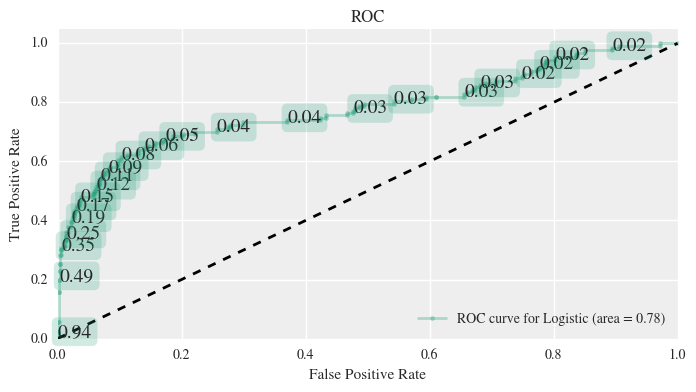

In [674]:
rcParams['figure.figsize'] = (8, 4)
make_roc("Logistic",Logistic, ytest, Xtest, None, labe=8)

In [679]:
# ax=make_roc("Logistic",clfl2, ytestlr, Xtestlr, None, labe=60)
# make_roc("dt",clfdt, ytestlr, Xtestlr, ax, labe=1)

In [680]:
#no